# ASSIGNMENT
Greetings Dear Student!
Let's learn and get fascinated about the beauty of data science

### Import the Libraries

## Introduction

In [1]:
# Let's get introduced First
name = input("Please Enter Your Name : ")
ID = input("Please Enter Your ID: ")

print(f"Hello! This is {name} and my ID is {ID}")

Please Enter Your Name : Ahammad Nafiz
Please Enter Your ID: 0152330006
Hello! This is Ahammad Nafiz and my ID is 0152330006


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset
We will try to look into one of the very common diseases of our country, Diabetes. From this dataset, we will try to download and will perform Exploratory Data Analysis ( EDA ).

### Download from Google Drive

In [3]:
# You can either download it from here or you can download it from eLMS and upload it in your runtime
!gdown 15Q0cGO4AkoGrmFd3C4GMPbJ_CTX3k_9E

'gdown' is not recognized as an internal or external command,
operable program or batch file.


### Read the dataset

In [4]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Questions to Solve

### Question 1 : Basic Data Analysis

In [5]:
# Find out the Row and Column count of the dataset
print(f"Row: {df.shape[0]}")
print(f"Column: {df.shape[1]}")

Row: 100000
Column: 9


In [6]:
# Find out if there is any null values in any of the columns of the dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Find out the basic statistical report of the dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Question 2: Data Distribution

In [8]:
# Find out the Gender wise distribution of the dataset
df.groupby('gender')['gender'].count()
# Or
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [9]:
#Percentages
df.groupby('gender')['gender'].count()/df['gender'].count() * 100

gender
Female    58.552
Male      41.430
Other      0.018
Name: gender, dtype: float64

In [10]:
df.groupby('gender').size()

gender
Female    58552
Male      41430
Other        18
dtype: int64

In [11]:
# Find out the Age distribution of the dataset
df['age'].value_counts()
# or
age_series = df.groupby('age').size().reset_index(name='count')
age_dataframe = pd.DataFrame(age_series)


print("Age Distribution:")
age_dataframe

Age Distribution:


,age,count
0,0.08,36
1,0.16,59
2,0.24,87
3,0.32,89
4,0.40,66
...,...,...
97,76.00,733
98,77.00,730
99,78.00,682
100,79.00,621


In [12]:
# Find out which type of people with Smoking history are more prone to diabetes
# 0 = not diabetes
# 1 = diabetes
smoking = df.groupby(['smoking_history', 'diabetes'])['smoking_history'].size().reset_index(name='count')
smoking_df = pd.DataFrame(smoking)
diabetes = smoking_df[smoking_df['diabetes'] == 1]
print(diabetes)

   smoking_history  diabetes  count
1          No Info         1   1454
3          current         1    948
5             ever         1    472
7           former         1   1590
9            never         1   3346
11     not current         1    690


In [13]:
diabetes_df = df[df['diabetes'] == 1]
diabetes_smoking_counts = diabetes_df['smoking_history'].value_counts()

print(diabetes_smoking_counts)

smoking_history
never          3346
former         1590
No Info        1454
current         948
not current     690
ever            472
Name: count, dtype: int64


### Question 3: Statistical Decisions and Demographics

In [14]:
# Find out the graph for people with hypertension having diabetes
hyper_diabetes_df = df[['hypertension', 'diabetes']]
hyper_diabetes = hyper_diabetes_df[(hyper_diabetes_df['hypertension'] == 1) & (hyper_diabetes_df['diabetes'] == 1)]
non_hyper_diabetes = hyper_diabetes_df[(hyper_diabetes_df['hypertension'] == 0) & (hyper_diabetes_df['diabetes'] == 1)]

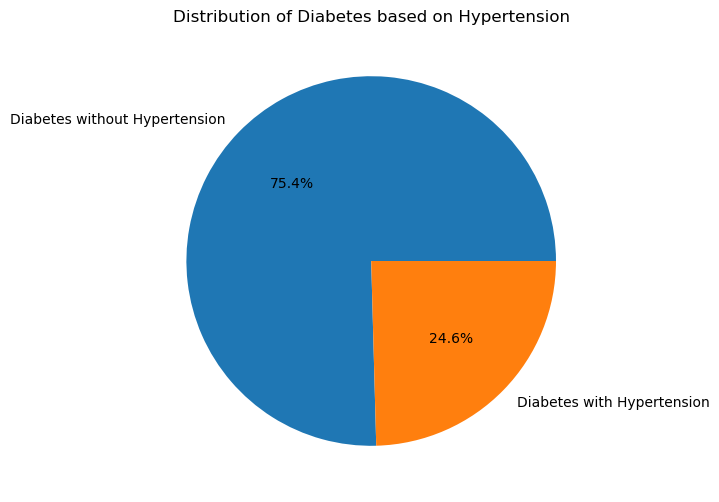

In [15]:
counts = [len(non_hyper_diabetes), len(hyper_diabetes)]
labels = ['Diabetes without Hypertension', 'Diabetes with Hypertension']

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Diabetes based on Hypertension')
plt.show()

In [16]:
# Find out the graph for people with heart disease having diabetes
heart_diabetes_df = df[['heart_disease', 'diabetes']]
heart_diabetes = heart_diabetes_df[(heart_diabetes_df['heart_disease'] == 1) & (heart_diabetes_df['diabetes'] == 1)]
non_heart_diabetes = heart_diabetes_df[(heart_diabetes_df['heart_disease'] == 0) & (heart_diabetes_df['diabetes'] == 1)]

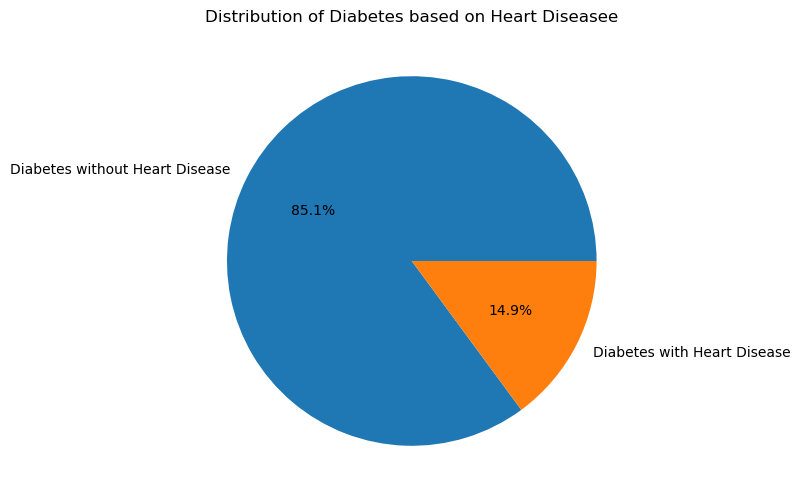

In [17]:
counts = [len(non_heart_diabetes), len(heart_diabetes)]
labels = ['Diabetes without Heart Disease', 'Diabetes with Heart Disease']

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Diabetes based on Heart Diseasee')
plt.show()

In [18]:
# Find out which BMI class has more tendency in having diabetes
def bmi_class(b):
    if b < 18.5:
        return 'Underweight'
    elif b < 25:
        return 'Normal weight'
    elif b < 30:
        return 'Overweight'
    else:
        return 'Obesity'

df['bmi_class'] = df['bmi'].apply(bmi_class)

In [19]:
diabetes_df = df[df['diabetes'] == 1]
counts = diabetes_df['bmi_class'].value_counts()
counts

bmi_class
Obesity          4233
Overweight       3340
Normal weight     863
Underweight        64
Name: count, dtype: int64

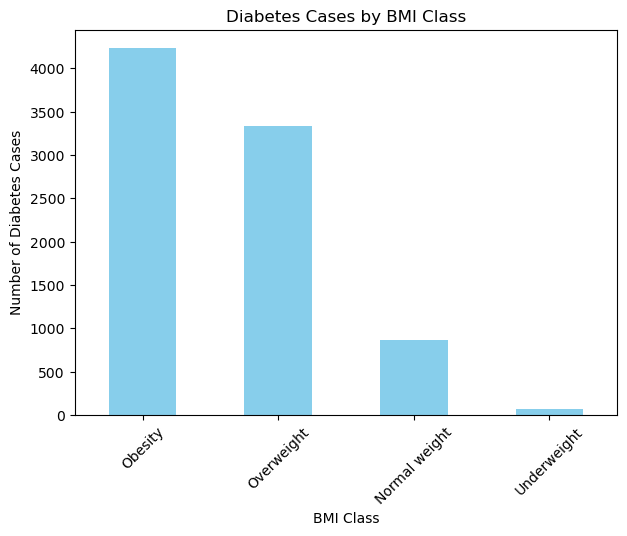

In [20]:
plt.figure(figsize=(7, 5))
counts.plot(kind='bar', color = 'skyblue')
plt.title('Diabetes Cases by BMI Class')
plt.xlabel('BMI Class')
plt.ylabel('Number of Diabetes Cases')
plt.xticks(rotation=45)
plt.show()